In [1]:
#clean/preprocess data: fill in missing values with mean, gen dummy variables from categorical "one hot encoding"
#identify and deal with outlier values (exclude from dataset) anything outside of 1.5-2x IQR (don't use stds because assumes normality; this data is not necessarily normal)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

In [3]:
from scipy import stats
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import collections 
from sklearn.decomposition import PCA, FastICA, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics  
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
import visuals as vs

In [5]:
df = pd.read_csv('US_Dialysis_03122019.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (26,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,ProviderGroup,Owner,Ownership,ManagingGroup,DVA-JV,RCG_ID,medicareNbr,NPI,VSA_ID,ServiceArea,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,FMC,Fresenius Kidney Care,NaN,NaN,NaN,R08218,22510,1.639554e+09,358,Alaska,...,0.0,0,0,0,0,0,8,21,22,0
1,independent_Chain,Liberty Dialysis / AD Partners II LLC,NaN,NaN,NaN,R08043,22509,1.316207e+09,358,Alaska,...,0.0,0,2,41,63,89,115,128,133,0
2,FMC,Fresenius Kidney Care,NaN,NaN,NaN,R00146,22500,1.770696e+09,358,Alaska,...,228.0,197,187,160,151,146,129,110,111,0
3,FMC,Fresenius Kidney Care,NaN,NaN,NaN,R00150,22505,1.780866e+09,358,Alaska,...,0.0,0,0,0,0,0,0,0,0,0
4,independent_Chain,Liberty Dialysis / Alaska Investment Partners LLC,JV,NaN,NaN,R00151,22506,1.841469e+09,358,Alaska,...,79.0,103,124,137,139,142,153,163,174,0


In [7]:
df.drop(df.columns[[1,2,3,4,5,6,7,9,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,28,29,30,31,32,33,35,39,40,41,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,169,170,171,172,174,175,176,177,178,179,180,181,182,183,184]], axis=1, inplace=True)
#list(df)
#df.dtypes




In [8]:
df.head()


,ProviderGroup,VSA_ID,OperatingStatus,Group,Facility Nbr,QIP_Score_2016,Five_Star_2017,Patient_Experience_2017,Stations,HD,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,FMC,358,Freestanding,NaN,1,No Score,4.0,NaN,7.0,True,...,0.0,0,0,0,0,0,8,21,22,0
1,independent_Chain,358,Freestanding,NaN,2,56,5.0,4.0,16.0,True,...,0.0,0,2,41,63,89,115,128,133,0
2,FMC,358,Freestanding,NaN,3,74,3.0,4.0,35.0,True,...,228.0,197,187,160,151,146,129,110,111,0
3,FMC,358,Closed,NaN,4,NaN,NaN,NaN,0.0,False,...,0.0,0,0,0,0,0,0,0,0,0
4,independent_Chain,358,Freestanding,NaN,5,72,5.0,5.0,18.0,True,...,79.0,103,124,137,139,142,153,163,174,0


In [9]:
#len(df)
df=df[df.ProviderGroup == 'DaVita']
#len(df)


In [10]:
df.drop(df.columns[[0,1,
]], axis=1, inplace=True)

In [11]:
opkeep = []
opkeep=['Freestanding','internal - At Home','internal - Acute Programs','Freestanding Home','deNovo','COO','internal - PD Programs']
#print (opkeep)            


In [12]:
df=df[df['OperatingStatus'].isin(opkeep)]
#len(df)

In [13]:
df.dtypes
#QIP_Score_2016 is an object and shouldn't be; 

OperatingStatus             object
Group                       object
Facility Nbr                 int64
QIP_Score_2016              object
Five_Star_2017             float64
Patient_Experience_2017    float64
Stations                   float64
HD                            bool
PD                            bool
HHD                           bool
Nocturnal                     bool
Evening                       bool
19_deNovo                     bool
19_Acq                        bool
19_Operating                  bool
Type                        object
2005                       float64
2006                       float64
2007                       float64
2008                       float64
2009                       float64
2010                       float64
2011                         int64
2012                         int64
2013                         int64
2014                         int64
2015                         int64
2016                         int64
2017                

In [14]:
df.QIP_Score_2016.unique()
df.loc[df.QIP_Score_2016 == "No Score",'QIP_Score_2016']=np.nan
df["QIP_Score_2016"] = pd.to_numeric(df["QIP_Score_2016"])

In [15]:
df.dtypes


OperatingStatus             object
Group                       object
Facility Nbr                 int64
QIP_Score_2016             float64
Five_Star_2017             float64
Patient_Experience_2017    float64
Stations                   float64
HD                            bool
PD                            bool
HHD                           bool
Nocturnal                     bool
Evening                       bool
19_deNovo                     bool
19_Acq                        bool
19_Operating                  bool
Type                        object
2005                       float64
2006                       float64
2007                       float64
2008                       float64
2009                       float64
2010                       float64
2011                         int64
2012                         int64
2013                         int64
2014                         int64
2015                         int64
2016                         int64
2017                

In [16]:
#preprocess data
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    #create an index over X, put it into output
    for col, col_data in X.iteritems():       
        if col_data.dtype == bool:
            col_data=col_data*1
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col) 
        # Collect the revised columns
        output = output.join(col_data)   
    #print "output type ", type(output)
    #output.info()
    #replace missing values with respective column means
    output = output.apply(lambda x: x.fillna(x.mean()),axis=0)

    #output.info()
    return output

df_clean = preprocess_features(df)


In [17]:
df_clean.head()


,OperatingStatus_COO,OperatingStatus_Freestanding,OperatingStatus_Freestanding Home,OperatingStatus_deNovo,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,OperatingStatus_internal - PD Programs,Group_APEX,Group_Dream Team,Group_Polaris,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,14,12,19,23,23,0,0
15,0,1,0,0,0,0,0,0,0,0,...,0.0,0,19,19,18,17,18,14,0,0
16,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,4,13,10,13,16,0,0
17,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,5,10,0,0
18,0,0,0,0,0,1,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [18]:
df_clean.dtypes


OperatingStatus_COO                            uint8
OperatingStatus_Freestanding                   uint8
OperatingStatus_Freestanding Home              uint8
OperatingStatus_deNovo                         uint8
OperatingStatus_internal - Acute Programs      uint8
OperatingStatus_internal - At Home             uint8
OperatingStatus_internal - PD Programs         uint8
Group_APEX                                     uint8
Group_Dream Team                               uint8
Group_Polaris                                  uint8
Group_Team Avanti                              uint8
Group_Team Endeavor                            uint8
Group_Team Fusion                              uint8
Group_Team Galaxy                              uint8
Group_Titan                                    uint8
Group_Trailblazers                             uint8
Facility Nbr                                   int64
QIP_Score_2016                               float64
Five_Star_2017                               f

In [19]:
df_clean.columns=df_clean.columns.values.tolist()
print (df_clean.columns)


Index(['OperatingStatus_COO', 'OperatingStatus_Freestanding',
       'OperatingStatus_Freestanding Home', 'OperatingStatus_deNovo',
       'OperatingStatus_internal - Acute Programs',
       'OperatingStatus_internal - At Home',
       'OperatingStatus_internal - PD Programs', 'Group_APEX',
       'Group_Dream Team', 'Group_Polaris', 'Group_Team Avanti',
       'Group_Team Endeavor', 'Group_Team Fusion', 'Group_Team Galaxy',
       'Group_Titan', 'Group_Trailblazers', 'Facility Nbr', 'QIP_Score_2016',
       'Five_Star_2017', 'Patient_Experience_2017', 'Stations', 'HD', 'PD',
       'HHD', 'Nocturnal', 'Evening', '19_deNovo', '19_Acq', '19_Operating',
       'Type_Metropolitan', 'Type_Micropolitan', 'Type_RURAL', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')


In [20]:
#create new dataframe with clean IQR columns, operate on all columns, update old data by merging new with old dataframe
#outlier flag in new columns, or new column with any outlier flag
#replace with absolute max rather than deleting old row
df_new=df_clean[['Facility Nbr','QIP_Score_2016','Patient_Experience_2017', 'Stations']]
df_new.head()

,Facility Nbr,QIP_Score_2016,Patient_Experience_2017,Stations
10,11,65.000000,3.315713,10.0
15,16,95.000000,3.315713,10.0
16,17,76.000000,3.315713,10.0
17,18,63.677593,3.315713,3.0
18,19,63.677593,3.315713,0.0


In [21]:
import collections 
# create an empty dictionary
outlier_dict = {}
#outlier_array=[]
# For each feature find the data points with extreme high or low values
for feature in df_new.columns:
    print(feature)
    if feature=='Facility Nbr':
        continue    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df_new[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df_new[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    #c = collections.Counter(log_data[~((df_new[feature] >= Q1 - step) & (df_new[feature] <= Q3 + step))])
    #print c
    # Display the outliers
    #print (""Data points considered outliers for the feature '{}':.format(feature))
    #create an outlier dataframe
    outlier_data = df_new[~((df_new[feature] >= Q1 - step) & (df_new[feature] <= Q3 + step))]
    print(outlier_data.shape)
    #subset the outlier data using only that column, facility number is the key
    outlier_data = outlier_data[['Facility Nbr', feature]]
    display(outlier_data)
    #add column to dictonary
    try:
        outlier_dict[feature]
    except:
        continue
print(outlier_dict)

Facility Nbr
QIP_Score_2016
(1156, 4)


,Facility Nbr,QIP_Score_2016
15,16,95.0
16,17,76.0
25,26,88.0
28,29,38.0
35,36,50.0
42,43,93.0
49,50,50.0
56,57,72.0
59,60,53.0
64,65,35.0


Patient_Experience_2017
(1381, 4)


,Facility Nbr,Patient_Experience_2017
24,25,3.0
39,40,3.0
43,44,3.0
50,51,2.0
64,65,3.0
68,69,3.0
73,74,5.0
87,88,3.0
88,89,4.0
90,91,4.0


Stations
(9, 4)


,Facility Nbr,Stations
538,539,76.0
768,769,58.0
852,853,59.0
4322,4323,53.0
4325,4326,53.0
5326,5327,52.0
5864,5865,60.0
8453,8454,53.0
8636,8637,72.0


{}


In [22]:
copy = df_clean

outlier_dict.keys()
outlier_dict.values()

for key_name in outlier_dict.keys():
    print(key_name)
    df_to_merge = outlier_dict[key_name]
    copy = pd.merge(copy, df_to_merge, how='left', on='Facility Nbr')
    




In [23]:
#copy.head()
#copy.columns=copy.columns.values.tolist()
#print (copy.columns)
copy.drop(copy.columns[[16,32,33,34,35,36,37,46]], axis=1, inplace=True)
copy.columns=copy.columns.values.tolist()
print (copy.columns)

Index(['OperatingStatus_COO', 'OperatingStatus_Freestanding',
       'OperatingStatus_Freestanding Home', 'OperatingStatus_deNovo',
       'OperatingStatus_internal - Acute Programs',
       'OperatingStatus_internal - At Home',
       'OperatingStatus_internal - PD Programs', 'Group_APEX',
       'Group_Dream Team', 'Group_Polaris', 'Group_Team Avanti',
       'Group_Team Endeavor', 'Group_Team Fusion', 'Group_Team Galaxy',
       'Group_Titan', 'Group_Trailblazers', 'QIP_Score_2016', 'Five_Star_2017',
       'Patient_Experience_2017', 'Stations', 'HD', 'PD', 'HHD', 'Nocturnal',
       'Evening', '19_deNovo', '19_Acq', '19_Operating', 'Type_Metropolitan',
       'Type_Micropolitan', 'Type_RURAL', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018'],
      dtype='object')


In [24]:
#fit to 5 components for elbow plot
copy_pca_elbow = PCA(n_components=5).fit(copy)
trans_copy_pca_elbow = copy_pca_elbow.transform(copy)


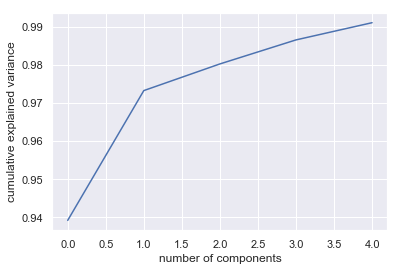

In [25]:
pca = PCA().fit(copy)
plt.plot(np.cumsum(copy_pca_elbow.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [26]:
#fit to 2 components 
pca = PCA(n_components=2)
pca.fit(copy)
#transform the copied data using the PCA fit above
trans_copy_pca = pca.transform(copy)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(trans_copy_pca, columns = ['Dimension 1', 'Dimension 2'])
#print(reduced_data.head)

In [27]:
print (copy)
print (trans_copy_pca)

      OperatingStatus_COO  OperatingStatus_Freestanding  \
10                      0                             1   
15                      0                             1   
16                      0                             1   
17                      0                             0   
18                      0                             0   
23                      0                             0   
24                      0                             1   
25                      0                             1   
26                      0                             0   
27                      0                             0   
28                      0                             1   
33                      0                             1   
35                      0                             1   
39                      0                             1   
40                      0                             0   
42                      0                             1 

Text(0, 0.5, 'PCA 2')

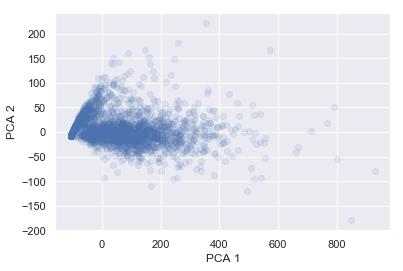

In [28]:
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], alpha=.1, c='b')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

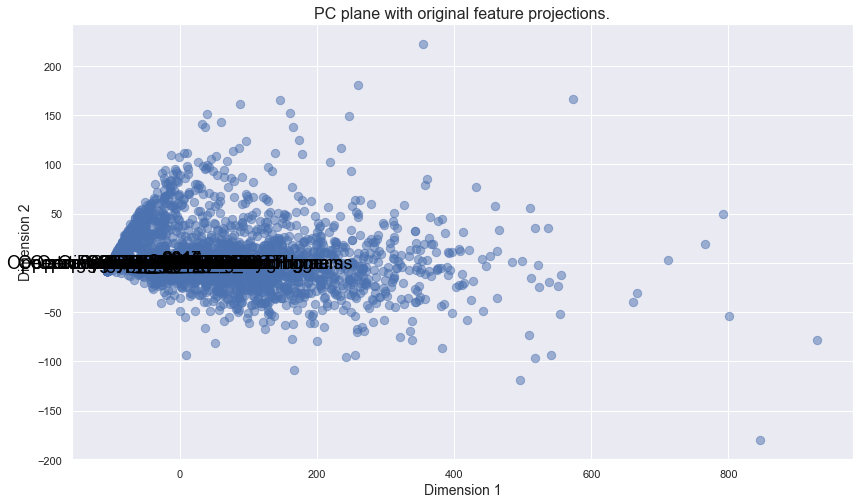

In [29]:
# Create a biplot
vs.biplot(copy, reduced_data, pca)

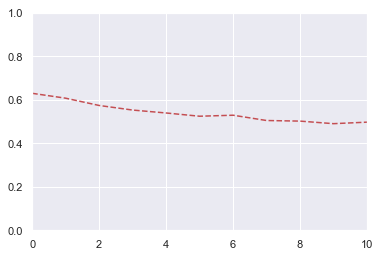

In [30]:
#create K-means clustering function
def kmeans_clusters(num, data):
    #assign k means fit function to kmeans name
    kmeans = KMeans(n_clusters=num, random_state=0).fit(data)
    #predict data into k means clusters
    kmeans_preds = kmeans.predict(data)
    kmeans_centers = kmeans.cluster_centers_
    kmeans_score = metrics.silhouette_score(data, kmeans_preds)
    return kmeans_score


df_kmeans_scores = []

for i in range(0,20):    
    df_kmeans_scores.append(kmeans_clusters(i+2, copy))

    
plt.plot(df_kmeans_scores, 'r--')
plt.axis([0,10,0,1])
plt.show()

In [31]:
# #fit the initial data with k means
# kmeans=KMeans(n_clusters=5).fit(copy)
# clustered_facilities=kmeans.fit_predict(copy)
# copy['Cluster'] = pd.Series(clustered_facilities, index=copy.index)
# print(clustered_facilities)
# print (copy.head())

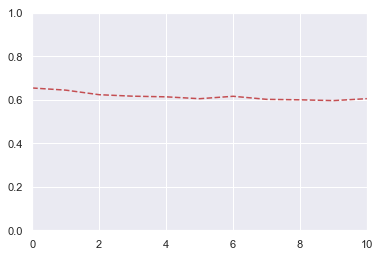

In [32]:
df_kmeans_scores_pca = []

for i in range(0,20):    
    df_kmeans_scores_pca.append(kmeans_clusters(i+2, trans_copy_pca))

    
plt.plot(df_kmeans_scores_pca, 'r--')
plt.axis([0,10,0,1])
plt.show()

In [33]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	#ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	 #          s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number");


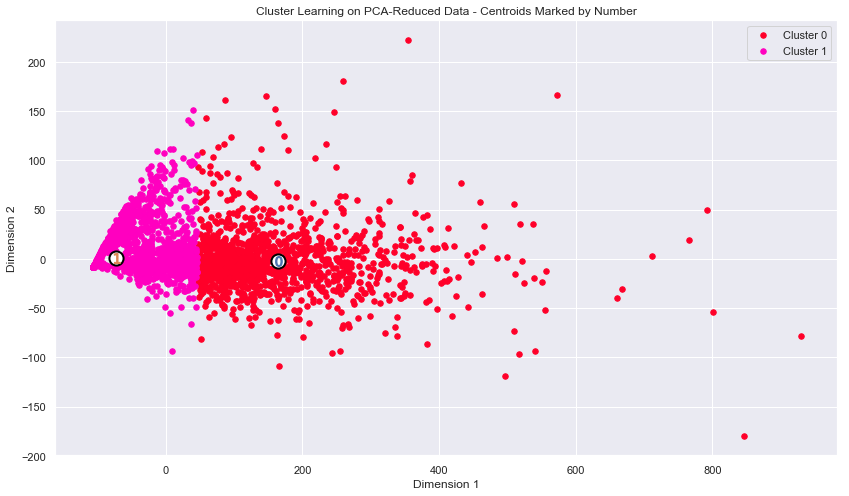

In [34]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(copy, preds)

kmeans_clusters (2,reduced_data)

cluster_results(reduced_data, preds, centers)

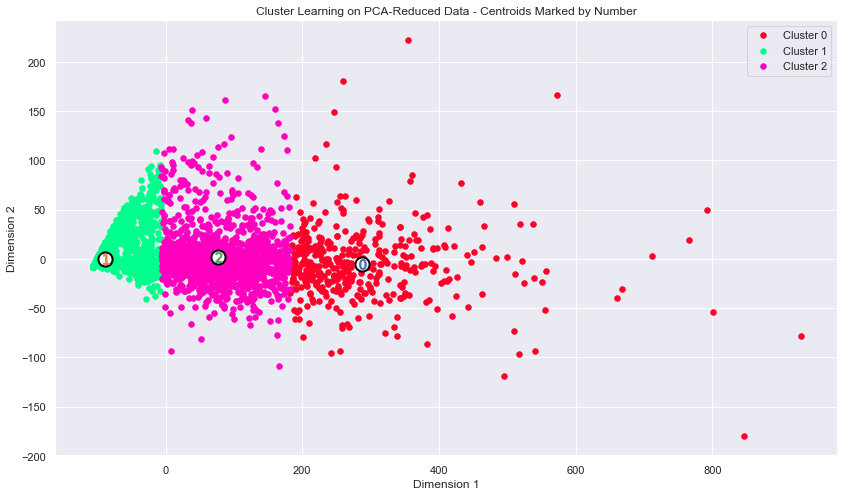

In [35]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=3, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(copy, preds)

kmeans_clusters (3,reduced_data)

cluster_results(reduced_data, preds, centers)

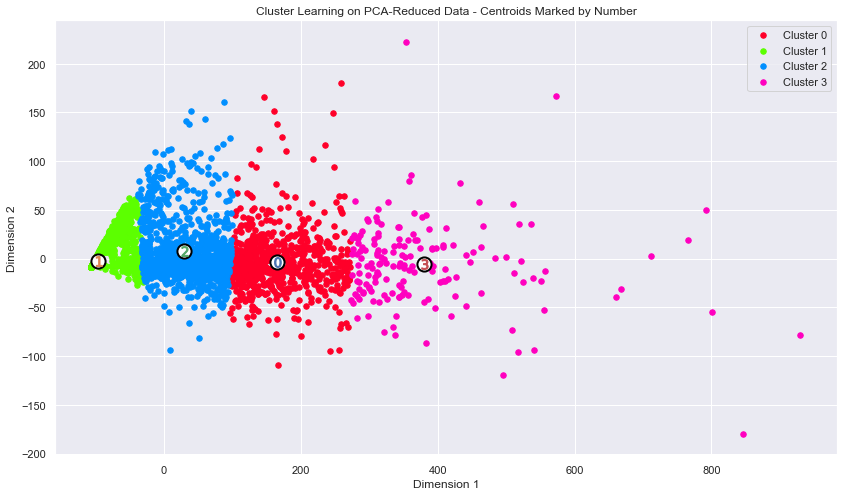

In [36]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=4, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(copy, preds)

kmeans_clusters (4,reduced_data)

cluster_results(reduced_data, preds, centers)

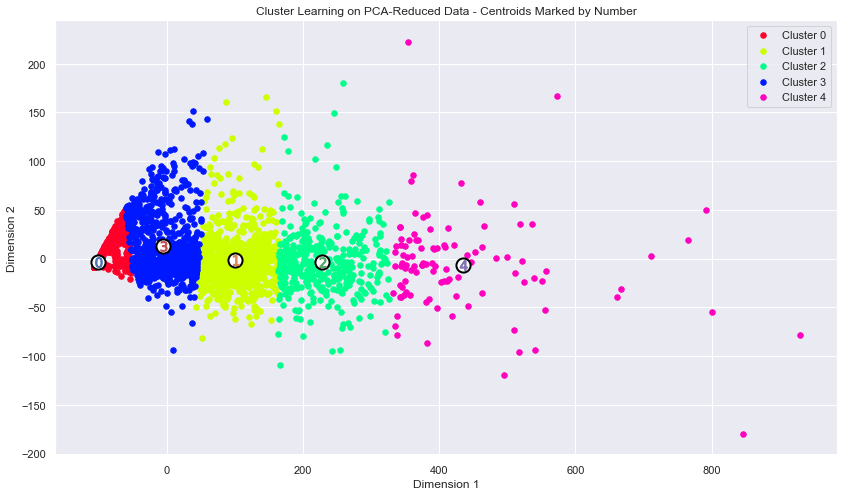

In [37]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=5, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(copy, preds)

kmeans_clusters (5,reduced_data)

cluster_results(reduced_data, preds, centers)

In [38]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-71.002114,14.689206
1,-66.013761,-1.644237
2,-84.430690,7.247963
3,-100.388448,-0.826050
4,-106.158063,-8.313972


In [39]:
#Build a case for the right number of clusters--test from 2 to 5
#if v-shaped clusters never show up, intuition is probably wrong
#1. try to understand how much of each original variable is expressed in each dimension of PCA
#2. pull out facilities close to each cluster centroid and examine the difference between each facility and between groups of facilities


In [40]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (50,20))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)


Dimension 1    0.9392
Dimension 2    0.9733
Name: Explained Variance, dtype: float64


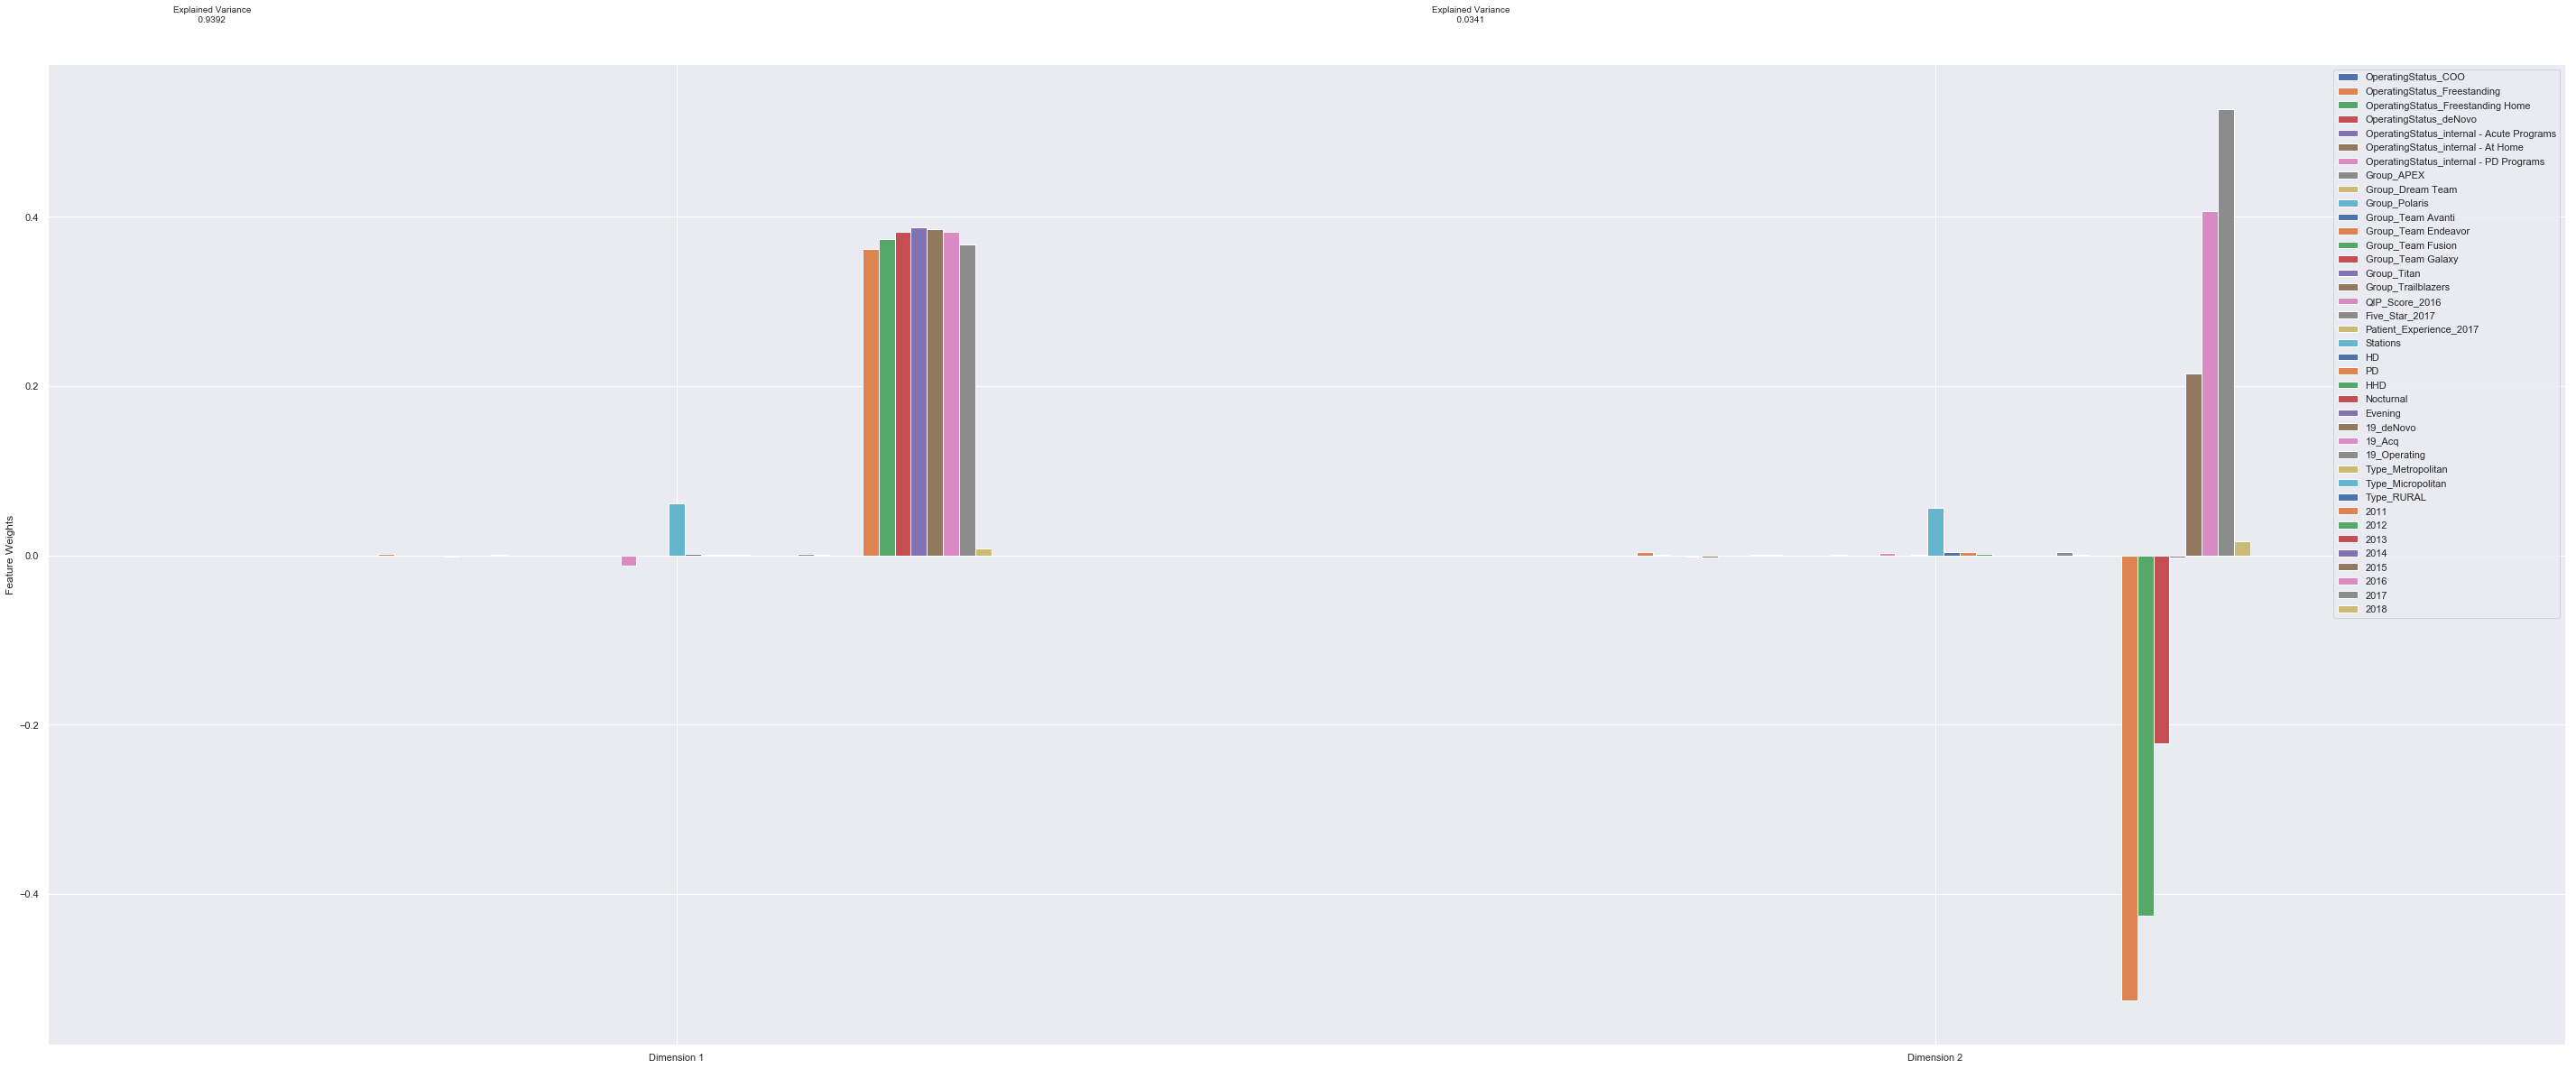

In [41]:
#From Fadi's code:
# Generate PCA results plot
pca_results = pca_results(copy, pca)

print (pca_results['Explained Variance'].cumsum())

In [42]:
components2 =(pd.DataFrame(pca.components_,columns=copy.columns,index = ['PC-1','PC-2']))
print(components2)

      OperatingStatus_COO  OperatingStatus_Freestanding  \
PC-1            -0.000093                      0.002153   
PC-2            -0.000189                      0.003692   

      OperatingStatus_Freestanding Home  OperatingStatus_deNovo  \
PC-1                          -0.000089               -0.000188   
PC-2                           0.000754               -0.000395   

      OperatingStatus_internal - Acute Programs  \
PC-1                                  -0.000604   
PC-2                                  -0.001303   

      OperatingStatus_internal - At Home  \
PC-1                           -0.001088   
PC-2                           -0.002349   

      OperatingStatus_internal - PD Programs  Group_APEX  Group_Dream Team  \
PC-1                                -0.00009   -0.000121          0.000341   
PC-2                                -0.00021   -0.000368          0.001187   

      Group_Polaris    ...     Type_Micropolitan  Type_RURAL      2011  \
PC-1       0.000061    .

In [43]:
components_transposed = components2.T
# print (components_transposed)
# components_bool = components_transposed['PC-1']>.001
# components_bool2 = components_transposed['PC-1']<-.001
# components_bool3 = components_transposed['PC-2']>.001
# components_bool4 = components_transposed['PC-2']<-.001
# components_bool_concat=pd.concat([components_bool,components_bool2,components_bool3, components_bool4],axis=1)
# print (components_bool_concat)

In [44]:
components_transposed.describe()

,PC-1,PC-2
count,39.000000,39.000000
mean,0.069302,0.001598
std,0.146242,0.162213
min,-0.012194,-0.525572
25%,-0.000092,-0.000420
50%,0.000015,-0.000030
75%,0.002146,0.002328
max,0.387206,0.527592


In [45]:
filter_df = components_transposed[(components_transposed ['PC-1'].abs()>0.001)|(components_transposed ['PC-2'].abs()>0.001)]
#to filter by rows, df2=df1[(criteriarange = criteria1) bitwiseoperator &| (criteriarange2=criteria2)]

In [46]:
filter_df.head()

,PC-1,PC-2
OperatingStatus_Freestanding,0.002153,0.003692
OperatingStatus_internal - Acute Programs,-0.000604,-0.001303
OperatingStatus_internal - At Home,-0.001088,-0.002349
Group_Dream Team,0.000341,0.001187
QIP_Score_2016,-0.012194,0.002859


In [47]:
def components_filter(df):
    if df[1] == True:
        return True
    elif df[2] == True:
        return True
    elif df[3] == True:
        return True
    elif df[4] == True:
        return True
    else:
        return False

In [48]:
#components_transposed.apply(components_filter)

In [49]:
#components_result=components_transposed.any(axis=1,bool_only=None)
#components_result

In [50]:
components_relevant_1a= (components_transposed['PC-1']>.001) 
components_relevant_1b=  (components_transposed['PC-1']<-.001) 
components_relevant_1= components_relevant_1a|components_relevant_1b
components_relevant_2 = ((components_transposed['PC-2']>.001) | (components_transposed['PC-2']<-.001))
components_relevant = components_relevant_1|components_relevant_2
components_transposed[components_relevant]

,PC-1,PC-2
OperatingStatus_Freestanding,0.002153,0.003692
OperatingStatus_internal - Acute Programs,-0.000604,-0.001303
OperatingStatus_internal - At Home,-0.001088,-0.002349
Group_Dream Team,0.000341,0.001187
QIP_Score_2016,-0.012194,0.002859
Stations,0.061530,0.056238
HD,0.002139,0.003667
PD,0.001232,0.004046
HHD,0.000546,0.001797
19_Operating,0.002063,0.004446


In [51]:
#clustered_facilities=pd.dataframe
#clustered_facilities=pd.merge(clustered_facilities, copy)

In [52]:
#fit the initial data with k means
kmeans=KMeans(n_clusters=5).fit(copy)
clustered_facilities=kmeans.fit_predict(copy)
copy['Cluster'] = pd.Series(clustered_facilities, index=copy.index)
print(clustered_facilities)
print (copy.head())

[0 0 0 ... 4 0 4]
    OperatingStatus_COO  OperatingStatus_Freestanding  \
10                    0                             1   
15                    0                             1   
16                    0                             1   
17                    0                             0   
18                    0                             0   

    OperatingStatus_Freestanding Home  OperatingStatus_deNovo  \
10                                  0                       0   
15                                  0                       0   
16                                  0                       0   
17                                  1                       0   
18                                  0                       0   

    OperatingStatus_internal - Acute Programs  \
10                                          0   
15                                          0   
16                                          0   
17                                          0   
18 

In [53]:
copy.loc[copy['Cluster'] == 0].describe()


,OperatingStatus_COO,OperatingStatus_Freestanding,OperatingStatus_Freestanding Home,OperatingStatus_deNovo,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,OperatingStatus_internal - PD Programs,Group_APEX,Group_Dream Team,Group_Polaris,...,Type_RURAL,2011,2012,2013,2014,2015,2016,2017,2018,Cluster
count,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,...,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.0
mean,0.031157,0.263600,0.045005,0.063304,0.202275,0.364491,0.030168,0.104847,0.073689,0.093472,...,0.036597,0.366963,0.423838,0.623145,1.014342,1.627102,3.051929,5.405539,0.301682,0.0
std,0.173786,0.440694,0.207366,0.243569,0.401796,0.481406,0.171092,0.306432,0.261329,0.291164,...,0.187818,2.421628,2.597316,3.126148,4.020149,5.351422,8.120918,12.094046,3.667932,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,24.000000,35.000000,30.000000,33.000000,34.000000,55.000000,87.000000,77.000000,0.0


In [54]:
copy.loc[copy['Cluster'] == 1].describe()


,OperatingStatus_COO,OperatingStatus_Freestanding,OperatingStatus_Freestanding Home,OperatingStatus_deNovo,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,OperatingStatus_internal - PD Programs,Group_APEX,Group_Dream Team,Group_Polaris,...,Type_RURAL,2011,2012,2013,2014,2015,2016,2017,2018,Cluster
count,802.0,802.000000,802.000000,802.0,802.0,802.0,802.0,802.000000,802.000000,802.000000,...,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.0
mean,0.0,0.981297,0.018703,0.0,0.0,0.0,0.0,0.094763,0.077307,0.073566,...,0.031172,71.342893,74.068579,75.761845,77.235661,79.158354,79.923940,79.210723,1.942643,1.0
std,0.0,0.135559,0.135559,0.0,0.0,0.0,0.0,0.293070,0.267244,0.261226,...,0.173891,22.094924,18.695311,15.278665,15.089763,16.104407,18.275201,19.536815,13.127406,0.0
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,41.000000,34.000000,0.000000,0.000000,0.000000,1.0
25%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,60.000000,62.000000,64.000000,65.000000,67.000000,67.000000,66.000000,0.000000,1.0
50%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,72.000000,74.000000,76.000000,76.000000,78.000000,79.000000,78.000000,0.000000,1.0
75%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,87.000000,87.000000,87.000000,88.000000,90.000000,91.000000,90.000000,0.000000,1.0
max,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,132.000000,164.000000,125.000000,121.000000,143.000000,166.000000,180.000000,125.000000,1.0


In [55]:
copy.loc[copy['Cluster'] == 2].describe()


,OperatingStatus_COO,OperatingStatus_Freestanding,OperatingStatus_Freestanding Home,OperatingStatus_deNovo,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,OperatingStatus_internal - PD Programs,Group_APEX,Group_Dream Team,Group_Polaris,...,Type_RURAL,2011,2012,2013,2014,2015,2016,2017,2018,Cluster
count,102.0,102.000000,102.000000,102.0,102.0,102.0,102.0,102.000000,102.000000,102.000000,...,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,0.0,0.990196,0.009804,0.0,0.0,0.0,0.0,0.029412,0.362745,0.117647,...,0.0,195.225490,201.117647,206.607843,209.480392,207.156863,207.431373,201.107843,2.519608,2.0
std,0.0,0.099015,0.099015,0.0,0.0,0.0,0.0,0.169792,0.483166,0.323781,...,0.0,57.710425,54.767609,50.516963,47.687666,45.866734,46.204348,48.589798,25.446792,0.0
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,65.000000,148.000000,153.000000,147.000000,139.000000,125.000000,0.000000,2.0
25%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,164.250000,169.250000,175.250000,178.000000,178.000000,179.250000,171.000000,0.000000,2.0
50%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,182.000000,187.500000,188.500000,196.000000,192.500000,194.000000,189.500000,0.000000,2.0
75%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,...,0.0,214.500000,218.000000,216.250000,220.000000,223.000000,225.750000,222.000000,0.000000,2.0
max,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,0.0,435.000000,419.000000,424.000000,385.000000,370.000000,363.000000,373.000000,257.000000,2.0


In [56]:
copy.loc[copy['Cluster'] == 3].describe()


,OperatingStatus_COO,OperatingStatus_Freestanding,OperatingStatus_Freestanding Home,OperatingStatus_deNovo,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,OperatingStatus_internal - PD Programs,Group_APEX,Group_Dream Team,Group_Polaris,...,Type_RURAL,2011,2012,2013,2014,2015,2016,2017,2018,Cluster
count,884.0,884.000000,884.000000,884.0,884.0,884.0,884.000000,884.000000,884.000000,884.000000,...,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.0
mean,0.0,0.929864,0.069005,0.0,0.0,0.0,0.001131,0.151584,0.042986,0.081448,...,0.102941,25.890271,27.549774,31.540724,36.569005,41.925339,46.393665,48.436652,1.561086,3.0
std,0.0,0.255520,0.253605,0.0,0.0,0.0,0.033634,0.358820,0.202941,0.273677,...,0.304054,20.137589,18.612238,16.882363,14.853867,14.549446,17.362859,20.548521,9.117933,0.0
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.750000,23.000000,27.000000,31.000000,34.000000,34.000000,0.000000,3.0
50%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,28.000000,30.000000,33.000000,37.000000,42.000000,45.000000,46.000000,0.000000,3.0
75%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,40.250000,42.000000,45.000000,47.000000,51.000000,55.000000,57.000000,0.000000,3.0
max,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,128.000000,109.000000,85.000000,82.000000,106.000000,148.000000,160.000000,77.000000,3.0


In [57]:
copy.loc[copy['Cluster'] == 4].describe()

,OperatingStatus_COO,OperatingStatus_Freestanding,OperatingStatus_Freestanding Home,OperatingStatus_deNovo,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,OperatingStatus_internal - PD Programs,Group_APEX,Group_Dream Team,Group_Polaris,...,Type_RURAL,2011,2012,2013,2014,2015,2016,2017,2018,Cluster
count,394.0,394.000000,394.000000,394.0,394.0,394.0,394.0,394.000000,394.000000,394.000000,...,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0
mean,0.0,0.994924,0.005076,0.0,0.0,0.0,0.0,0.068528,0.187817,0.137056,...,0.002538,118.124365,122.197970,125.558376,127.870558,127.885787,128.050761,125.355330,3.545685,4.0
std,0.0,0.071156,0.071156,0.0,0.0,0.0,0.0,0.252971,0.391063,0.344344,...,0.050379,29.379369,23.341723,19.771800,19.593477,20.497121,23.275045,24.501558,20.469905,0.0
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,75.000000,88.000000,77.000000,0.000000,0.000000,0.000000,4.0
25%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,104.000000,106.250000,110.000000,113.000000,112.000000,112.000000,109.250000,0.000000,4.0
50%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,118.000000,119.000000,122.000000,125.000000,125.000000,126.000000,124.000000,0.000000,4.0
75%,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,136.000000,138.000000,139.750000,142.000000,142.000000,142.000000,141.000000,0.000000,4.0
max,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,198.000000,187.000000,183.000000,182.000000,185.000000,202.000000,217.000000,156.000000,4.0


In [58]:
copy_vis=copy[['OperatingStatus_Freestanding','OperatingStatus_internal - Acute Programs','OperatingStatus_internal - At Home','Group_Dream Team','QIP_Score_2016','Stations','HD','PD','HHD','19_Operating','2011','2012','2013','2014','2015','2016','2017','Cluster']]

In [59]:
copy_vis.head()

,OperatingStatus_Freestanding,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,Group_Dream Team,QIP_Score_2016,Stations,HD,PD,HHD,19_Operating,2011,2012,2013,2014,2015,2016,2017,Cluster
10,1,0,0,0,65.000000,10.0,1,0,0,1,0,0,14,12,19,23,23,0
15,1,0,0,0,95.000000,10.0,1,1,0,1,0,19,19,18,17,18,14,0
16,1,0,0,0,76.000000,10.0,1,0,0,1,0,0,4,13,10,13,16,0
17,0,0,0,0,63.677593,3.0,0,1,0,1,0,0,0,0,0,5,10,0
18,0,0,1,0,63.677593,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
print (copy_vis.groupby('Cluster').describe())

        19_Operating                                                 2011  \
               count      mean       std  min  25%  50%  75%  max   count   
Cluster                                                                     
0             2022.0  0.308605  0.462032  0.0  0.0  0.0  1.0  1.0  2022.0   
1              802.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   802.0   
2              102.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   102.0   
3              884.0  0.998869  0.033634  0.0  1.0  1.0  1.0  1.0   884.0   
4              394.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   394.0   

                     ...  QIP_Score_2016        Stations             \
               mean  ...             75%    max    count       mean   
Cluster              ...                                              
0          0.366963  ...       63.677593  100.0   2022.0   4.540267   
1         71.342893  ...       68.000000   89.0    802.0  18.826683   
2        195.225490  ...    

In [61]:
#print (copy_vis.groupby('Cluster').median())
clusters= (copy_vis.groupby('Cluster').median())
#copy_vis.groupby(['Cluster'], as_index=False)['time'].agg({'mean': 'mean'})
print (clusters.head())

         OperatingStatus_Freestanding  \
Cluster                                 
0                                   0   
1                                   1   
2                                   1   
3                                   1   
4                                   1   

         OperatingStatus_internal - Acute Programs  \
Cluster                                              
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

         OperatingStatus_internal - At Home  Group_Dream Team  QIP_Score_2016  \
Cluster                                                                         
0                                         0                 0       63.677593   
1                                         0                 0       62.000000   
2        

In [62]:
from sklearn import preprocessing# Get column names first
names = clusters.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_cluster = scaler.fit_transform(clusters)
scaled_cluster = pd.DataFrame(scaled_cluster, columns=names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [63]:
print(scaled_cluster)

   OperatingStatus_Freestanding  OperatingStatus_internal - Acute Programs  \
0                          -2.0                                        0.0   
1                           0.5                                        0.0   
2                           0.5                                        0.0   
3                           0.5                                        0.0   
4                           0.5                                        0.0   

   OperatingStatus_internal - At Home  Group_Dream Team  QIP_Score_2016  \
0                                 0.0               0.0        0.625421   
1                                 0.0               0.0        0.023149   
2                                 0.0               0.0       -1.412887   
3                                 0.0               0.0        1.459185   
4                                 0.0               0.0       -0.694869   

   Stations   HD        PD  HHD  19_Operating      2011      2012      2013  \
0

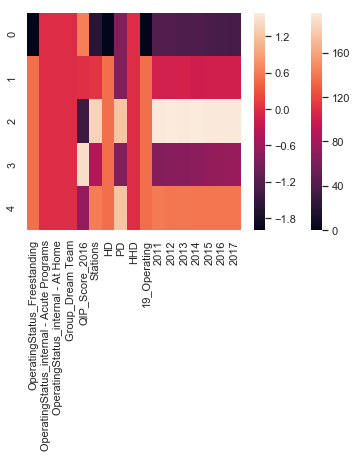

In [64]:
#sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),cmap="YlGnBu", annot=True, cbar=False)
sns.heatmap(clusters)
sns.heatmap(scaled_cluster)

In [65]:
#print (copy_vis.groupby('Cluster').median())
clusters2= (copy_vis.groupby('Cluster').mean())
#copy_vis.groupby(['Cluster'], as_index=False)['time'].agg({'mean': 'mean'})
print (clusters2.head())

         OperatingStatus_Freestanding  \
Cluster                                 
0                            0.263600   
1                            0.981297   
2                            0.990196   
3                            0.929864   
4                            0.994924   

         OperatingStatus_internal - Acute Programs  \
Cluster                                              
0                                         0.202275   
1                                         0.000000   
2                                         0.000000   
3                                         0.000000   
4                                         0.000000   

         OperatingStatus_internal - At Home  Group_Dream Team  QIP_Score_2016  \
Cluster                                                                         
0                                  0.364491          0.073689       64.580879   
1                                  0.000000          0.077307       61.619299   
2        

In [66]:
from sklearn import preprocessing# Get column names first
names = clusters2.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_cluster2 = scaler.fit_transform(clusters2)
scaled_cluster2 = pd.DataFrame(scaled_cluster2, columns=names)

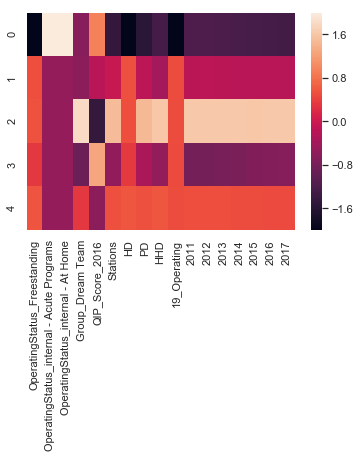

In [67]:
#sns.heatmap(clusters2)
sns.heatmap(scaled_cluster2)